In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading data file
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

#display top of dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.set_index('Unnamed: 0',inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

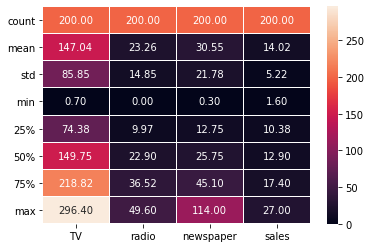

In [9]:
sns.heatmap(df.describe(),annot=True,linecolor='white',fmt='.2f',linewidths=0.1)

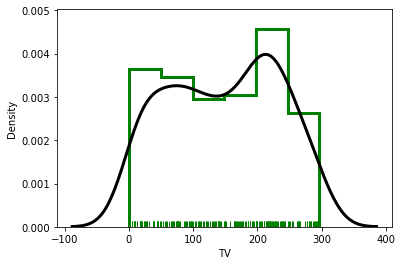

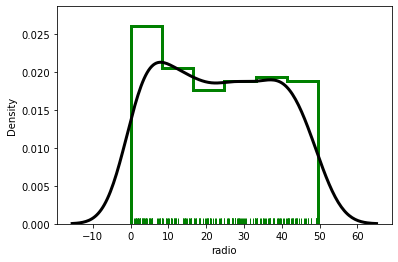

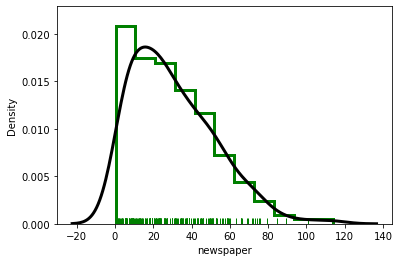

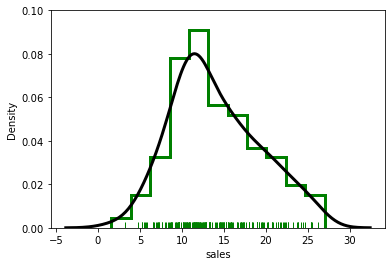

<Figure size 432x288 with 0 Axes>

In [10]:
for i in df.columns:
    sns.distplot(df[i],rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
    plt.figure()

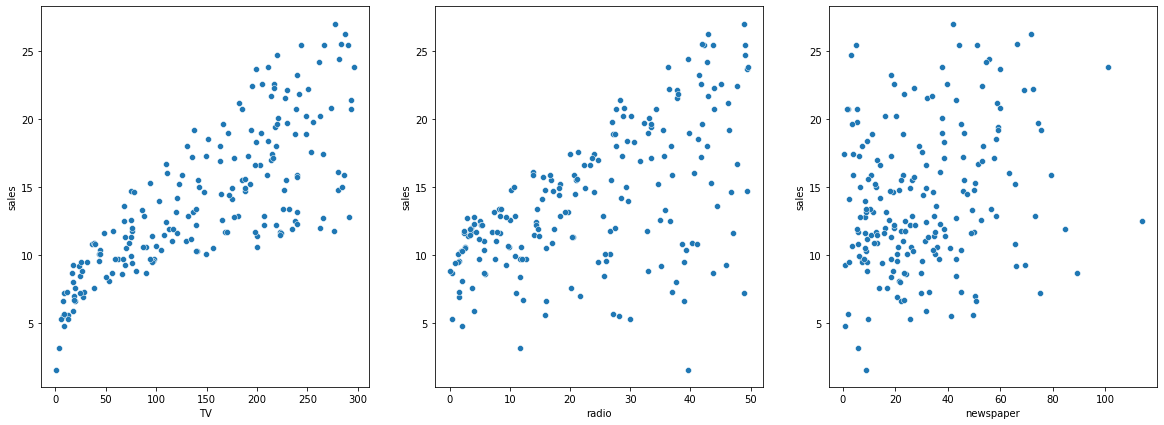

In [11]:
plt.figure(figsize=(20,7))

plt.subplot(131)
sns.scatterplot(df['TV'],df['sales'],palette="deep")

plt.subplot(132)
sns.scatterplot(df['radio'],df['sales'],palette="deep")

plt.subplot(133)
sns.scatterplot(df['newspaper'],df['sales'],palette="deep")

plt.show()

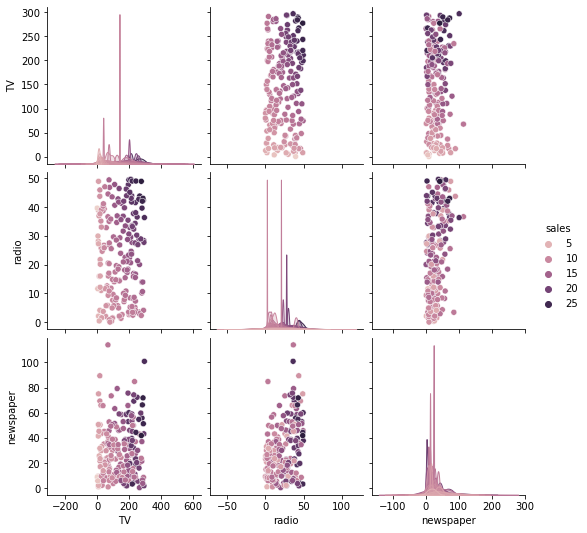

In [12]:
sns.pairplot(df,hue='sales')

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

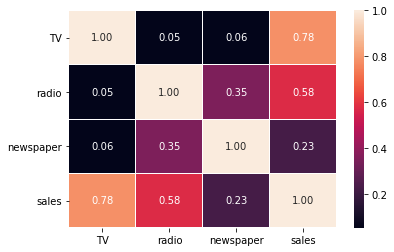

In [14]:
sns.heatmap(df.corr(),annot=True,linecolor='white',fmt='.2f',linewidths=0.1)

<Figure size 432x288 with 0 Axes>

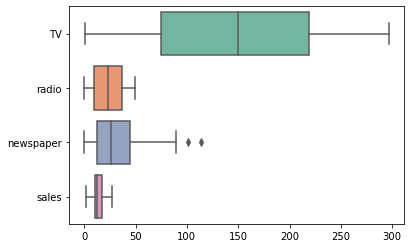

<Figure size 432x288 with 0 Axes>

In [15]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.figure()

In [16]:
### Data Cleaning 

## Removing outliers

#Importing zscore from scipy.stats

from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)] # Threshold value is +/-3

print('Shape of new data set after removing outliers:',new_df.shape)
print('Shape of data set with outliers:',df.shape)

Shape of new data set after removing outliers: (198, 4)
Shape of data set with outliers: (200, 4)


In [17]:
##Calculating data loss

D_t=((200-198)/200)*100
print('Data loss after removing outliers is :',D_t,'%')

Data loss after removing outliers is : 1.0 %


In [18]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [19]:
x=new_df.drop(['sales'],axis=1)
y=new_df['sales']

In [20]:
#Creating train-test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [21]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    R2S_lr=r2_score(y_train, pred_train)
    print('r2_score for Linear regreesion:',R2S_lr)
    if R2S_lr>maxAccu:
        maxAccu=R2S_lr
        maxRS=i
    print('Best r2_score is : ',maxAccu*100,'on random state :' ,maxRS)

r2_score for Linear regreesion: 0.88586994520838
Best r2_score is :  88.586994520838 on random state : 0
r2_score for Linear regreesion: 0.886089690919527
Best r2_score is :  88.6089690919527 on random state : 1
r2_score for Linear regreesion: 0.9137739454384091
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.9023834789281908
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.9002938768700731
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.895935137523506
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.9017449009440633
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.89222748011076
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesion: 0.9029760471576862
Best r2_score is :  91.37739454384091 on random state : 2
r2_score for Linear regreesi

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=10)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (154, 3) (154,)
Testing set shape:  (44, 3) (44,)


In [23]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting the test set results
pred_test = LR.predict(x_test)
pred_train = LR.predict(x_train)

#testing accuracy
lr_accuracy = LR.score(x_train,y_train) * 100
print('Score for LinearRegression Model:',lr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_lr=r2_score(y_train, pred_train)
print('r2_score for Linear regreesion:',R2S_lr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for Linear Regression:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for Linear Regression:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for Linear Regression:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_LR = cross_val_score(LR, x_train, y_train, cv=5).mean()*100
print('CV score for Linear regression:',cv_score_LR)

Score for LinearRegression Model: 92.44112217503162
-------------------------------------------------------------------------------------------------------------------
r2_score for Linear regreesion: 0.9244112217503162
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for Linear Regression: 1.0718700932783622
Mean Squared Error for Linear Regression: 1.9607918081786075
Root mean squared error for Linear Regression: 1.4002827600804801
-------------------------------------------------------------------------------------------------------------------
CV score for Linear regression: 88.68902171854991


In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

# Predicting the test set results
pred_test = knn.predict(x_test)
pred_train = knn.predict(x_train)

#testing accuracy
knn_accuracy = knn.score(x_train,y_train) * 100
print('Score for KNeighborsRegressor Model:',knn_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_knn=r2_score(y_train, pred_train)
print('r2_score for KNeighborsRegressor:',R2S_knn)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for KNeighborsRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for KNeighborsRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for KNeighborsRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_knn = cross_val_score(knn, x_train, y_train, cv=5).mean()*100
print('CV score for KNeighborsRegressor:',cv_score_knn)

Score for KNeighborsRegressor Model: 94.27386388504519
-------------------------------------------------------------------------------------------------------------------
r2_score for KNeighborsRegressor: 0.942738638850452
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for KNeighborsRegressor: 0.9048051948051946
Mean Squared Error for KNeighborsRegressor: 1.4853740259740258
Root mean squared error for KNeighborsRegressor: 1.2187592157493725
-------------------------------------------------------------------------------------------------------------------
CV score for KNeighborsRegressor: 84.27124515160764


In [25]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

# Predicting the test set results
pred_test = svr.predict(x_test)
pred_train = svr.predict(x_train)

#testing accuracy
svr_accuracy = svr.score(x_train,y_train) * 100
print('Score for SVR Model:',svr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_svr=r2_score(y_train, pred_train)
print('r2_score for SVR:',R2S_svr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for SVR:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for SVR:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for SVR:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_svr = cross_val_score(knn, x_train, y_train, cv=5).mean()*100
print('CV score for SVR:',cv_score_svr)

Score for SVR Model: 85.93271549050479
-------------------------------------------------------------------------------------------------------------------
r2_score for SVR: 0.8593271549050479
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for SVR: 1.3739693818096999
Mean Squared Error for SVR: 3.6490887759058905
Root mean squared error for SVR: 1.9102588243235237
-------------------------------------------------------------------------------------------------------------------
CV score for SVR: 84.27124515160764


In [26]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)

# Predicting the test set results
pred_test = dtc.predict(x_test)
pred_train = dtc.predict(x_train)

#testing accuracy
dtc_accuracy = dtc.score(x_train,y_train) * 100
print('Score for DecisionTreeRegressor Model:',dtc_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_dtc=r2_score(y_train, pred_train)
print('r2_score for DecisionTreeRegressor:',R2S_dtc)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for DecisionTreeRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for DecisionTreeRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for DecisionTreeRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_dtc = cross_val_score(dtc, x_train, y_train, cv=5).mean()*100
print('CV score for DecisionTreeRegressor:',cv_score_dtc)

Score for DecisionTreeRegressor Model: 100.0
-------------------------------------------------------------------------------------------------------------------
r2_score for DecisionTreeRegressor: 1.0
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for DecisionTreeRegressor: 0.0
Mean Squared Error for DecisionTreeRegressor: 0.0
Root mean squared error for DecisionTreeRegressor: 0.0
-------------------------------------------------------------------------------------------------------------------
CV score for DecisionTreeRegressor: 93.08939485933625


In [27]:
#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

# Predicting the test set results
pred_test = ada.predict(x_test)
pred_train = ada.predict(x_train)

#testing accuracy
ada_accuracy = ada.score(x_train,y_train) * 100
print('Score for AdaBoostRegressor:',ada_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_ada=r2_score(y_train, pred_train)
print('r2_score for AdaBoostRegressor:',R2S_ada)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for AdaBoostRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for AdaBoostRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for AdaBoostRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_ada = cross_val_score(ada, x_train, y_train, cv=5).mean()*100
print('CV score for AdaBoostRegressor:',cv_score_ada)

Score for AdaBoostRegressor: 97.62862278017063
-------------------------------------------------------------------------------------------------------------------
r2_score for AdaBoostRegressor: 0.9762862278017063
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for AdaBoostRegressor: 0.6420816837284496
Mean Squared Error for AdaBoostRegressor: 0.6151411802666953
Root mean squared error for AdaBoostRegressor: 0.7843093651529958
-------------------------------------------------------------------------------------------------------------------
CV score for AdaBoostRegressor: 94.15951126951508


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbst = GradientBoostingRegressor()
gbst.fit(x_train, y_train)

# Predicting the test set results
pred_test = gbst.predict(x_test)
pred_train = gbst.predict(x_train)

#testing accuracy
gbst_accuracy = gbst.score(x_train,y_train) * 100
print('Score for GradientBoostingRegressor:',gbst_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_gbst=r2_score(y_train, pred_train)
print('r2_score for GradientBoostingRegressor:',R2S_gbst)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for GradientBoostingRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for GradientBoostingRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for GradientBoostingRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_gbst = cross_val_score(gbst, x_train, y_train, cv=5).mean()*100
print('CV score for GradientBoostingRegressor:',cv_score_gbst)

Score for GradientBoostingRegressor: 99.89415672928685
-------------------------------------------------------------------------------------------------------------------
r2_score for GradientBoostingRegressor: 0.9989415672928684
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for GradientBoostingRegressor: 0.1270423635380805
Mean Squared Error for GradientBoostingRegressor: 0.02745600907579873
Root mean squared error for GradientBoostingRegressor: 0.1656985488041423
-------------------------------------------------------------------------------------------------------------------
CV score for GradientBoostingRegressor: 97.67988455150173


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Predicting the test set results
pred_test = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

#testing accuracy
rfr_accuracy = rfr.score(x_train,y_train) * 100
print('Score for RandomForestRegressor:',rfr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_rfr=r2_score(y_train, pred_train)
print('r2_score for RandomForestRegressor:',R2S_rfr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for RandomForestRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for RandomForestRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for RandomForestRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_rfr = cross_val_score(rfr, x_train, y_train, cv=5).mean()*100
print('CV score for RandomForestRegressor:',cv_score_rfr)

Score for RandomForestRegressor: 99.70010342247484
-------------------------------------------------------------------------------------------------------------------
r2_score for RandomForestRegressor: 0.9970010342247484
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for RandomForestRegressor: 0.21514285714285694
Mean Squared Error for RandomForestRegressor: 0.07779392207792232
Root mean squared error for RandomForestRegressor: 0.2789156182036465
-------------------------------------------------------------------------------------------------------------------
CV score for RandomForestRegressor: 97.32751076810672


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

# Predicting the test set results
pred_test = etr.predict(x_test)
pred_train = etr.predict(x_train)

#testing accuracy
etr_accuracy = etr.score(x_train,y_train) * 100
print('Score for ExtraTreesRegressor:',etr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_etr=r2_score(y_train, pred_train)
print('r2_score for ExtraTreesRegressor:',R2S_etr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for ExtraTreesRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for ExtraTreesRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for ExtraTreesRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_etr = cross_val_score(etr, x_train, y_train, cv=5).mean()*100
print('CV score for ExtraTreesRegressor:',cv_score_etr)

Score for ExtraTreesRegressor: 99.99999809752607
-------------------------------------------------------------------------------------------------------------------
r2_score for ExtraTreesRegressor: 0.9999999809752608
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for ExtraTreesRegressor: 0.00011688311689947763
Mean Squared Error for ExtraTreesRegressor: 4.935064935088763e-07
Root mean squared error for ExtraTreesRegressor: 0.0007025001733159048
-------------------------------------------------------------------------------------------------------------------
CV score for ExtraTreesRegressor: 98.89843119055585


Text(0, 0.5, 'Regressor Names')

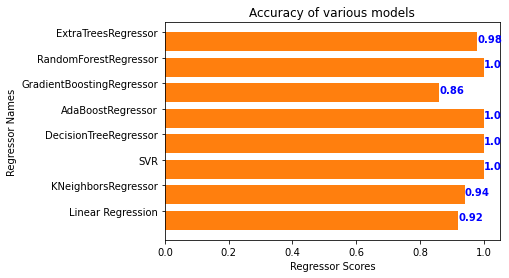

In [31]:
regressor_names = np.array(['Linear Regression', 'KNeighborsRegressor',
                    'SVR', 'DecisionTreeRegressor', 'AdaBoostRegressor','GradientBoostingRegressor',
                           'RandomForestRegressor','ExtraTreesRegressor' ])

regressor_scores = np.array([R2S_lr, R2S_knn, R2S_gbst,R2S_rfr,R2S_etr,
                             R2S_svr, R2S_dtc, R2S_ada]).round(2)
regressor_CV_scores=np.array([cv_score_LR,cv_score_knn,cv_score_svr,cv_score_dtc,cv_score_ada,
                             cv_score_gbst,cv_score_rfr,cv_score_etr]).round(2)

# Plotting the bar graph of r2_score for every classifier

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(regressor_scores))  # the x locations for the groups
for i, v in enumerate(regressor_scores):
    ax.text(v, i, str(v), color='blue', fontweight='bold')
ax.barh(ind, regressor_scores, width, color="tab:orange")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(regressor_names, minor=False)
plt.title('Accuracy of various models')
plt.xlabel('Regressor Scores')
plt.ylabel('Regressor Names') 




Text(0, 0.5, 'Regressor Names')

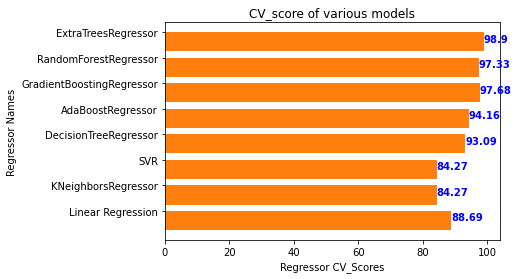

In [32]:
# Plotting the bar graph of cv_scores for every classifier

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(regressor_CV_scores))  # the x locations for the groups
for i, v in enumerate(regressor_CV_scores):
    ax.text(v, i, str(v), color='blue', fontweight='bold')
ax.barh(ind, regressor_CV_scores, width, color="tab:orange")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(regressor_names, minor=False)
plt.title('CV_score of various models')
plt.xlabel('Regressor CV_Scores')
plt.ylabel('Regressor Names')   

In [33]:
### Hyper parameter Tuning.
##importing library
from sklearn.model_selection import GridSearchCV
#ExtraTrees 

ex_param_grid = {"max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

#Create new ETC object
ETC_2 = ExtraTreesRegressor()

#Use GridSearch
GCV = GridSearchCV(ETC_2, ex_param_grid, cv=5)

#Fit the model
best_model = GCV.fit(x_train,y_train)

#checking for best parameters
GCV.best_params_

{'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [34]:
#Creating Final Model after hyperparameter tuning for ExtraTreesRegressor

f_mod_ETC= ExtraTreesRegressor(max_features=3,min_samples_split=2,
                                min_samples_leaf=1)
f_mod_ETC.fit(x_train, y_train)

y_pred = f_mod_ETC.predict(x_train)

#testing accuracy
etc_accuracy = f_mod_ETC.score(x_train,y_train) * 100
print('Score for ExtraTreesRegressor:',etc_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')

#Measuring for r2_score
R2S_etc=r2_score(y_train, y_pred)
print('r2_score for ExtraTreesRegressor after hyper parameter tuning:',R2S_etr*100)

Score for ExtraTreesRegressor: 99.99999739661463
-------------------------------------------------------------------------------------------------------------------
r2_score for ExtraTreesRegressor after hyper parameter tuning: 99.99999809752607


In [35]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_ETC,'adv_sales_channel_etc.obj')

['adv_sales_channel_etc.obj']